In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils # for one-hot encoding

batch_size = 16
num_classes = 10
epochs = 20 
#data_augmentation = True
num_predictions = 20

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_test = np_utils.to_categorical(y_test, num_classes = 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.dtype, y_train.dtype)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
float32 float32


In [0]:
#split validation set
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [0]:
#building basic model
model_basic = Sequential()
model_basic.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_basic.add(Activation('relu'))
model_basic.add(Conv2D(32, (3, 3)))
model_basic.add(Activation('relu'))
model_basic.add(MaxPooling2D(pool_size=(2, 2)))
model_basic.add(Dropout(0.25))

model_basic.add(Conv2D(64, (3, 3), padding='same'))
model_basic.add(Activation('relu'))
model_basic.add(Conv2D(64, (3, 3)))
model_basic.add(Activation('relu'))
model_basic.add(MaxPooling2D(pool_size=(2, 2)))
model_basic.add(Dropout(0.25))

model_basic.add(Flatten())
model_basic.add(Dense(512))
model_basic.add(Activation('relu'))
model_basic.add(Dropout(0.5))
model_basic.add(Dense(num_classes))
model_basic.add(Activation('softmax'))

#model
#model.summary()

# Let's train the model using RMSprop
model_basic.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='cifa_10_simple.hdf5', 
                              verbose=1, save_best_only=True) #save the best model
history = model_basic.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          epochs=epochs,callbacks=[checkpointer],verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 14s 354us/step - loss: 1.7022 - acc: 0.3793 - val_loss: 1.3215 - val_acc: 0.5247

Epoch 00001: val_loss improved from inf to 1.32145, saving model to cifa_10_simple.hdf5
Epoch 2/20
40000/40000 [==============================] - 12s 296us/step - loss: 1.2598 - acc: 0.5495 - val_loss: 1.0940 - val_acc: 0.6159

Epoch 00002: val_loss improved from 1.32145 to 1.09404, saving model to cifa_10_simple.hdf5
Epoch 3/20
40000/40000 [==============================] - 12s 297us/step - loss: 1.0520 - acc: 0.6289 - val_loss: 0.9680 - val_acc: 0.6568

Epoch 00003: val_loss improved from 1.09404 to 0.96805, saving model to cifa_10_simple.hdf5
Epoch 4/20
40000/40000 [==============================] - 12s 297us/step - loss: 0.9245 - acc: 0.6786 - val_loss: 0.8153 - val_acc: 0.7148

Epoch 00004: val_loss improved from 0.96805 to 0.81531, saving model to cifa_10_simple.hdf5
Epoch 5/20
40000/40000 [==

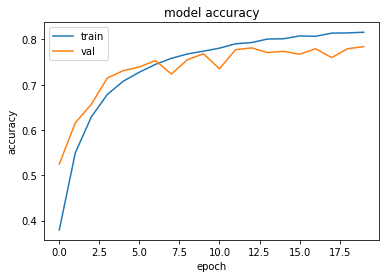

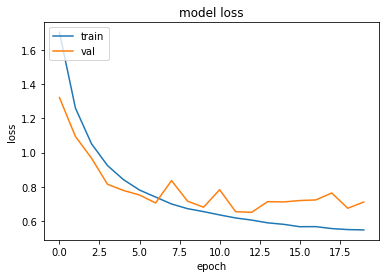

In [0]:
import matplotlib.pyplot as plt                        
%matplotlib inline    

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
model_basic.load_weights('cifa_10_simple.hdf5')
y_pred = model_basic.predict(x_test)


In [0]:
import numpy as np
count = 0
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(y_test[i])): 
        count += 1
score = count/len(y_pred)
print('accuracy rate:%.2f%s' % (score*100,'%'))

accuracy rate:78.19%


In [0]:
from keras.models import *
from keras.layers import *
def build_model(out_dims, img_size):
    inputs_dim = Input((img_size, img_size, 3))

    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(inputs_dim)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same',activation = 'relu')(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same',activation = 'relu')(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same',activation = 'relu')(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), strides=(1, 1), padding='same',activation = 'relu')(x)
    x = Conv2D(256, (3, 3), strides=(1, 1), padding='same',activation = 'relu')(x)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    x_flat = Flatten()(x)
    dp_1 = Dropout(0.4)(x_flat)
    fc2 = Dense(out_dims)(dp_1)
    fc2 = Activation('softmax')(fc2)

    build_model = Model(inputs=inputs_dim, outputs=fc2)
    return model

model_2 = build_model(out_dims=10, img_size=32)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range = 0.1, 
                             height_shift_range = 0.1, 
                             horizontal_flip = True,
                             zoom_range = 0.3) 

batch_size = 64
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size, shuffle=False)

In [0]:
from keras.layers import *
from keras.models import *
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD

checkpointer = ModelCheckpoint(filepath='cifa_10_zq.hdf5', 
                               verbose=1, save_best_only=True) #save the best model

model_2.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 80

history_2 = model_2.fit_generator(train_generator,
          validation_data = (x_val,y_val),
          epochs=epochs,
          callbacks=[checkpointer],
          verbose=1)

Epoch 1/80
625/625 [==============================] - 24s 39ms/step - loss: 0.4894 - acc: 0.8347 - val_loss: 0.5674 - val_acc: 0.8282

Epoch 00001: val_loss improved from inf to 0.56741, saving model to cifa_10_zq.hdf5
Epoch 2/80
625/625 [==============================] - 21s 34ms/step - loss: 0.4832 - acc: 0.8361 - val_loss: 0.5417 - val_acc: 0.8333

Epoch 00002: val_loss improved from 0.56741 to 0.54170, saving model to cifa_10_zq.hdf5
Epoch 3/80
625/625 [==============================] - 21s 34ms/step - loss: 0.4835 - acc: 0.8339 - val_loss: 0.5581 - val_acc: 0.8316

Epoch 00003: val_loss did not improve from 0.54170
Epoch 4/80
625/625 [==============================] - 21s 34ms/step - loss: 0.4761 - acc: 0.8369 - val_loss: 0.5414 - val_acc: 0.8307

Epoch 00004: val_loss improved from 0.54170 to 0.54143, saving model to cifa_10_zq.hdf5
Epoch 5/80
625/625 [==============================] - 21s 34ms/step - loss: 0.4675 - acc: 0.8426 - val_loss: 0.5057 - val_acc: 0.8412

Epoch 00005: v

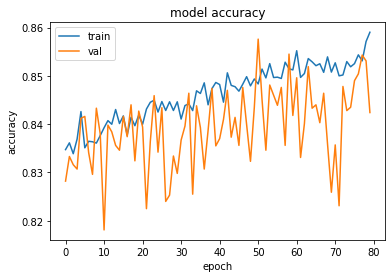

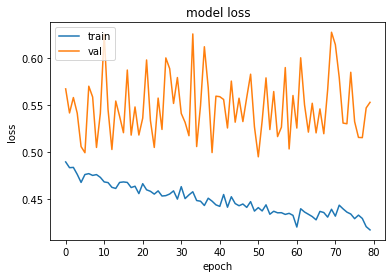

In [0]:
import matplotlib.pyplot as plt                        
%matplotlib inline    

plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
model_2.load_weights('cifa_10_zq.hdf5')
y_pred = model_2.predict(x_test)
count = 0
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(y_test[i])):
        count += 1
score = count/len(y_pred)
print('Accuracy rate:%.2f%s' % (score*100,'%'))

Accuracy rate:85.02%


In [0]:
scores = model_2.evaluate(x_test, y_test, verbose=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 157us/step
Test loss: 0.5057612937569618
Test accuracy: 0.8502
